In [1]:
import pyforest

In [31]:
active_imports()

import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression


['import seaborn as sns',
 'import pandas as pd',
 'from sklearn.linear_model import LinearRegression']

In [4]:
path = r'C:\my-drive\git-repos\my-learning\my_ml_learning\data\50_Startups.csv'

In [5]:
df = pd.read_csv(path)
df.head(2)

<IPython.core.display.Javascript object>

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


<IPython.core.display.Javascript object>

<AxesSubplot:>

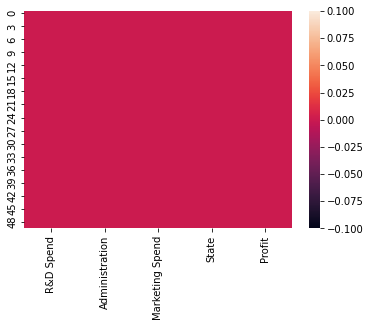

In [26]:
sns.heatmap(df.isnull())

<IPython.core.display.Javascript object>

<AxesSubplot:>

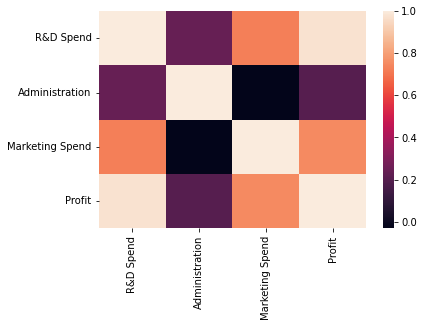

In [27]:
sns.heatmap(df.corr())

In [6]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [7]:
X.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,New York
1,162597.7,151377.59,443898.53,California


In [8]:
y[:2]

0    192261.83
1    191792.06
Name: Profit, dtype: float64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [11]:
df.State.value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [12]:
? pd.get_dummies

<IPython.core.display.Javascript object>

Signature:
 pd.get_dummies(
    data,
    prefix=None,
    prefix_sep='_',
    dummy_na=False,
    columns=None,
    sparse=False,
    drop_first=False,
    dtype=None,
) -> 'DataFrame'
Docstring:
Convert categorical variable into dummy/indicator variables.

Parameters
----------
data : array-like, Series, or DataFrame
    Data of which to get dummy indicators.
prefix : str, list of str, or dict of str, default None
    String to append DataFrame column names.
    Pass a list with length equal to the number of columns
    when calling get_dummies on a DataFrame. Alternatively, `prefix`
    can be a dictionary mapping column names to prefixes.
prefix_sep : str, default '_'
    If appending prefix, separator/delimiter to use. Or pass a
    list or dictionary as with `prefix`.
dummy_na : bool, default False
    Add a column to indicate NaNs, if False NaNs are ignored.
columns : list-like, default None
    Column names in the DataFrame to be encoded.
    If `columns` is None then all the c

In [14]:
state = pd.get_dummies(df['State'], drop_first=True)
state

<IPython.core.display.Javascript object>

,Florida,New York
0,0,1
1,0,0
2,1,0
3,0,1
4,1,0
5,0,1
6,0,0
7,1,0
8,0,1
9,0,0


In [23]:
X1 = X.copy()
X1.head(2)

,R&D Spend,Administration,Marketing Spend,State
0,165349.2,136897.80,471784.10,New York
1,162597.7,151377.59,443898.53,California


In [24]:
X1.drop(columns=['State'], inplace=True, axis=1)
X1.head(2)

,R&D Spend,Administration,Marketing Spend
0,165349.2,136897.80,471784.10
1,162597.7,151377.59,443898.53


In [25]:
X1 = pd.concat([X1, state], axis=1)
X1.head(2)

<IPython.core.display.Javascript object>

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.2,136897.80,471784.10,0,1
1,162597.7,151377.59,443898.53,0,0


## Model Creation

In [30]:
model = LinearRegression()


C:\Users\595244\Anaconda3\envs\krish_env_new\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\595244\Anaconda3\envs\krish_env_new\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


<IPython.core.display.Javascript object>

In [34]:
X1.head(2)

,R&D Spend,Administration,Marketing Spend,Florida,New York
0,165349.2,136897.80,471784.10,0,1
1,162597.7,151377.59,443898.53,0,0


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

<IPython.core.display.Javascript object>

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
y_hat = model.predict(X_test)

In [38]:
len(y_test), len(y_hat)

(10, 10)

<IPython.core.display.Javascript object>

C:\Users\595244\Anaconda3\envs\krish_env_new\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

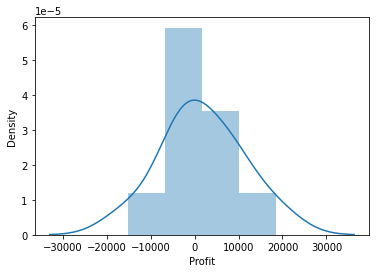

In [39]:
sns.distplot(y_test - y_hat)

In [41]:
metrics.r2_score(y_test, y_hat)

<IPython.core.display.Javascript object>

0.8987266414328635